In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
lan_counts = movies.original_language.value_counts().to_frame().reset_index()
lan_counts.columns = ['original language', 'total']
lan_counts.head()

,original language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


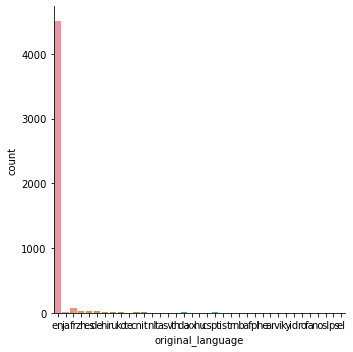

In [15]:
sns.catplot(x='original_language', kind='count', data=movies)

<AxesSubplot:xlabel='original language', ylabel='total'>

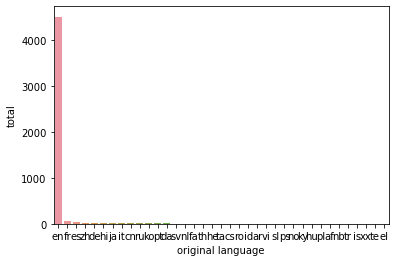

In [16]:
sns.barplot(x='original language', y='total', data=lan_counts)

In [20]:
total = movies.original_language.value_counts().sum()
total_ingles = movies.original_language.value_counts().loc['en']
total_resto = total - total_ingles

print(f'{total}')
print(f'{total_ingles}')
print(f'{total_resto}')

4803
4505
298


In [22]:
df = {
    'lingua':['ingles', 'outros'],
    'total':[total_ingles, total_resto]
}

dataframe = pd.DataFrame(df)
dataframe

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

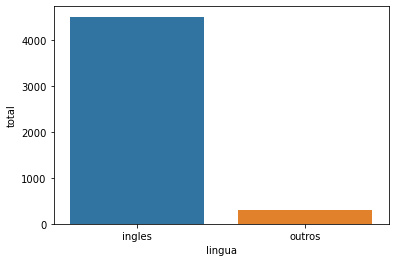

In [26]:
sns.barplot(x='lingua', y='total', data=dataframe)

In [30]:
df2 = movies.query("original_language != 'en'").original_language.value_counts().to_frame().reset_index()
df2.columns = ['original_language', 'total']
df2.head()

,original_language,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19


<AxesSubplot:xlabel='original_language', ylabel='total'>

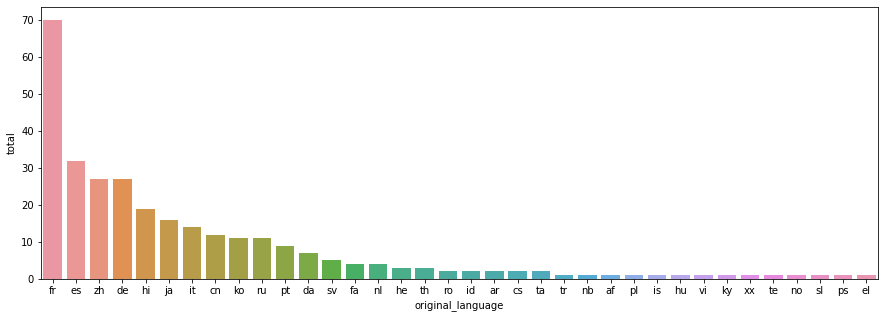

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(x='original_language', y='total', data=df2)

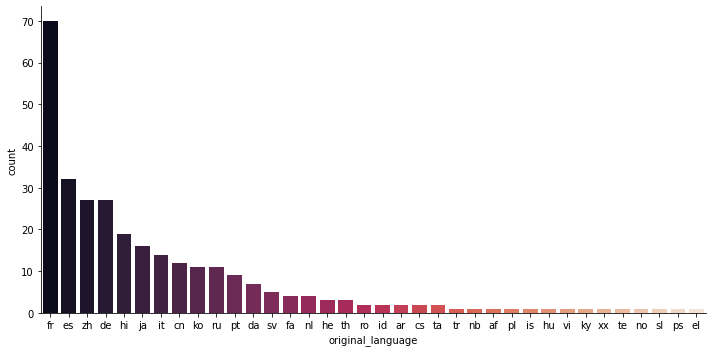

In [41]:
df3 = movies.query("original_language != 'en'")
sns.catplot(x='original_language', kind='count', data=df3, 
            aspect=2, 
            order=df2.original_language,
            palette = 'rocket'
           )